In [1]:
#  모델
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
head_pt_file = r'.\yolov5\save_model\yolov5_small_head_finetuned_16_30\heads_5s_16_S_sx.pt' 
pose_pt_file = r'detection\yolov7-w6-pose.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', head_pt_file, force_reload=True)
model = model.to(device)
model.conf = 0.7

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\HS/.cache\torch\hub\master.zip
YOLOv5  2024-6-19 Python-3.10.13 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


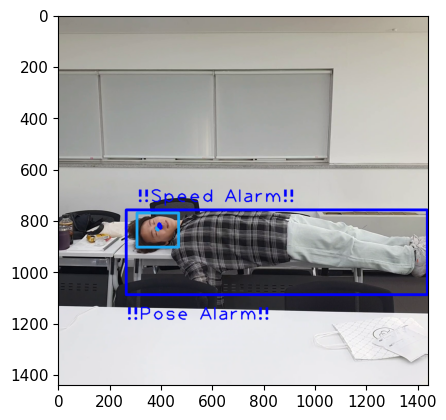

In [8]:
# yolov5 비디오 테스트
import module.Tracking_both as tr
import importlib

importlib.reload(tr)
%matplotlib inline

falldown_video_path = r".\test_video\falldown_large.mp4"
falldown_save_path = r"..\101.ppt\video\v5_small_head_64_30_falldwon_large_alram_pose.mp4" # 수정할곳
# falldown_video_path = r".\test_video\falldown_small.mp4"
# falldown_save_path = r"..\101.ppt\video\v5_small_head_64_30_falldown_small_alram.mp4" # 수정할곳
# sleep_video_path = r".\test_video\sleep_large.mp4"
# sleep_save_path = r"..\101.ppt\video\v5_small_head_64_30_sleep_large_alram.mp4" # 수정할곳
# sleep_video_path = r".\test_video\sleep_small.mp4"
# sleep_save_path = r"..\101.ppt\video\v5_small_head_64_30_sleep_small_alram.mp4" # 수정할곳
obj_thres = 100 
update_thres = 40 
tracking_count = 50

track_video = tr.Tracking_Both(model, pose_pt_file)
# ps_route, ps_dist = track_video.track_video(obj_thres, update_thres, tracking_count, video_path, True) # 샘플만 확인, 저장안함

# falldown 영상 
ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, falldown_video_path, False, falldown_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)
# ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, falldown_video_path, False) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# # # 결과 파일로 저장
# # import os
# # import json
# # result_save_root = r"test_video\tracking"
# # result_save_file = falldown_save_path.split("\\")[-1].split(".")[0] + ".json"
# # result_save_path = os.path.join(result_save_root, result_save_file)

# # result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

# # with open(result_save_path, "w") as f:
# #     json.dump(result_falldown, f)
    
# # # # sleep 영상 
# # # ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, sleep_video_path, False, sleep_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)

# # # # 결과 파일로 저장
# # # result_save_root = r"test_video\tracking"
# # # result_save_file = sleep_save_path.split("\\")[-1].split(".")[0] + ".json"
# # # result_save_path = os.path.join(result_save_root, result_save_file)

# # # result_falldown = {"ps_route" : ps_route, "ps_dist" : ps_dist, "ps_all_route" : ps_all_route, "recognized_count" : recognized_count}

# # # with open(result_save_path, "w") as f:
# # #     json.dump(result_falldown, f)

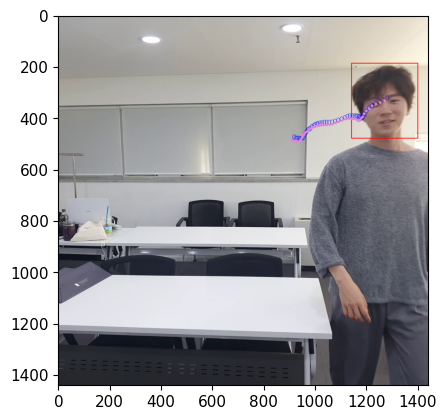

In [3]:
################################# yolov5 최종 비디오 테스트 #################################
###########################################################################################
###########################################################################################
###########################################################################################
###########################################################################################

import module.Tracking_both as tr
import importlib

importlib.reload(tr)
%matplotlib inline

falldown_video_path = r".\test_video\final_test2.mp4"
falldown_save_path = r"..\101.ppt\video\v5_small_head_64_30_falldwon_large_alram_final.mp4"
obj_thres = 100 
update_thres = 40 
tracking_count = 50
track_video = tr.Tracking_Both(model, pose_pt_file)

ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, falldown_video_path, False, falldown_save_path) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)
# ps_route, ps_dist, ps_all_route, recognized_count = track_video.track_video(obj_thres, update_thres, tracking_count, falldown_video_path, False) # 비디오경로, 샘플링여부(100프레임만), 저장여부(파일이름으로 지정)